In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/content/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

In [ ]:
!pip install transformers

In [ ]:
!pip install torch

In [ ]:
data = pd.read_csv('/content/sample_data/btcNewsToPrice2.csv',index_col="date")
data.shape

(2146, 42)

In [ ]:
data.head()

,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
date,,,,,,,,,,,,,,,,,,,,,
2015-07-12,bitcoin the next logical step in the rise of u...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,310.4,292.0,315.9,291.3,120.70K,6.33%
2015-07-13,bitgive foundation announces new initiatives a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,290.4,310.4,310.9,276.9,146.85K,-6.47%
2015-07-14,keynote 2015 harnessing the distributed ledge...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,287.0,290.4,297.0,285.2,60.62K,-1.17%
2015-07-15,patrick byrne says will be able to replace w...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,283.4,287.0,292.9,283.2,59.58K,-1.23%
2015-07-16,2015 q1 bitcoin investment trumps 2014 numbers...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,276.6,283.4,290.8,273.3,121.32K,-2.41%


In [ ]:
#data['date'] = pd.to_datetime(data['date'])
btc_trace = go.Scatter(x=data.index, y=data['price'], name= 'Price')
py.iplot([btc_trace])
plt.show()

In [ ]:
data['price'].replace(0, np.nan, inplace=True)
data['price'].fillna(method='ffill', inplace=True)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'open'}>],
       [<Axes: title={'center': 'high'}>,
        <Axes: title={'center': 'low'}>]], dtype=object)

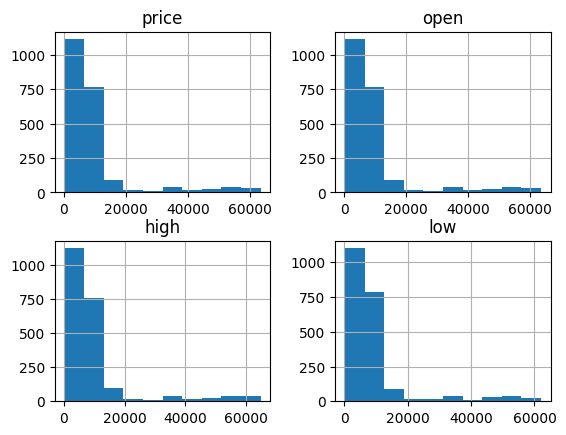

In [ ]:
# btc_trace = go.Scatter(x=data.index, y=data['price'], name= 'Price')
# plt.plot([btc_trace])
# plt.show()
data.hist()

[[<Axes: xlabel='price', ylabel='price'>
  <Axes: xlabel='open', ylabel='price'>
  <Axes: xlabel='high', ylabel='price'>
  <Axes: xlabel='low', ylabel='price'>]
 [<Axes: xlabel='price', ylabel='open'>
  <Axes: xlabel='open', ylabel='open'>
  <Axes: xlabel='high', ylabel='open'>
  <Axes: xlabel='low', ylabel='open'>]
 [<Axes: xlabel='price', ylabel='high'>
  <Axes: xlabel='open', ylabel='high'>
  <Axes: xlabel='high', ylabel='high'>
  <Axes: xlabel='low', ylabel='high'>]
 [<Axes: xlabel='price', ylabel='low'>
  <Axes: xlabel='open', ylabel='low'> <Axes: xlabel='high', ylabel='low'>
  <Axes: xlabel='low', ylabel='low'>]]


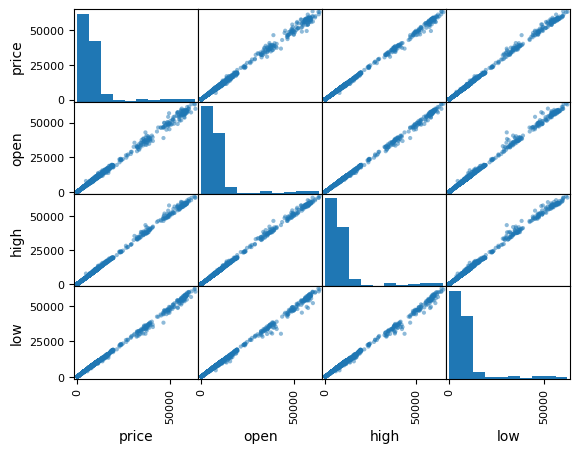

In [ ]:
from pandas.plotting import scatter_matrix
d=scatter_matrix(data)
print(d)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
values = data['price'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

1502 644


In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

1501
643


In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

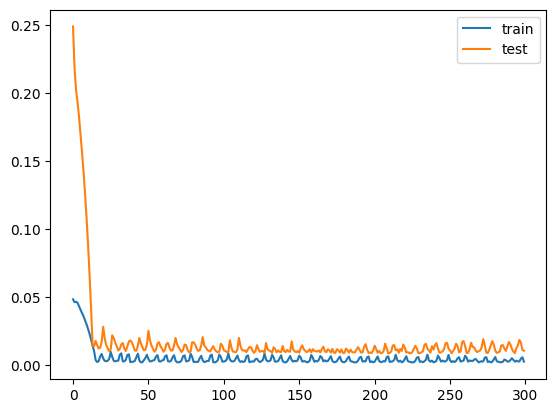

In [ ]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

21/21 [==============================] - 0s 2ms/step


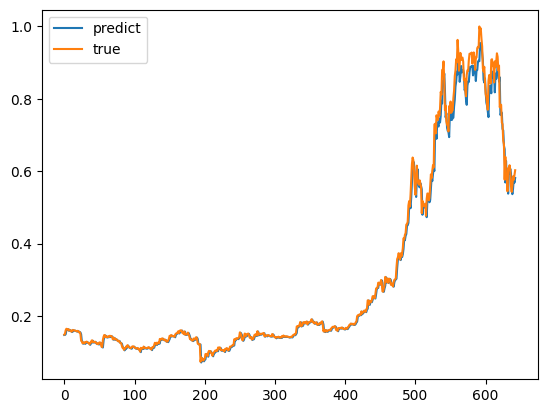

In [ ]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [ ]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [ ]:
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 1312.766


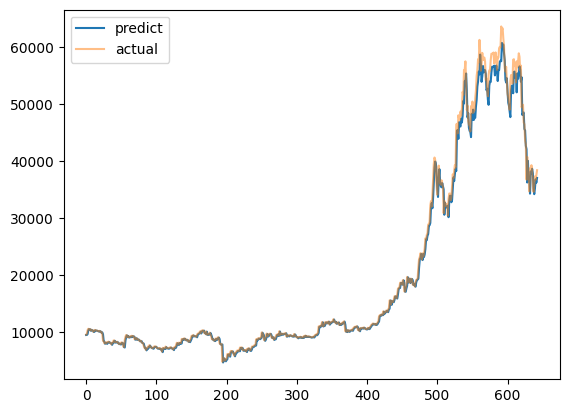

In [ ]:
pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='actual', alpha=0.5)
pyplot.legend()
pyplot.show()

In [ ]:
predictDates = data.tail(len(testX)).index

In [ ]:
predictDates

Index(['2019-08-31', '2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
       '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08', '2019-09-09',
       ...
       '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
       '2021-05-30', '2021-05-31', '2021-06-01', '2021-06-02', '2021-06-03'],
      dtype='object', name='date', length=643)

In [ ]:
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

In [ ]:
actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, actual_chart])

<ipython-input-385-e06c93cae6dc>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

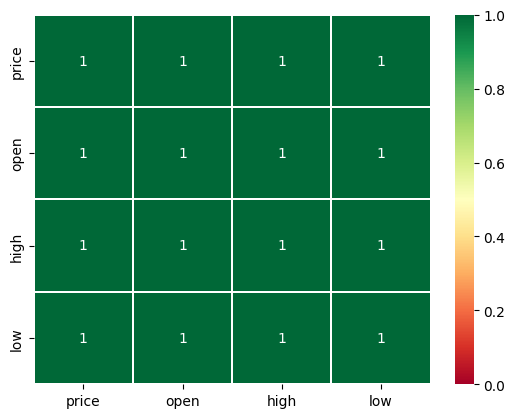

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
values = data[['price']].values

In [ ]:
values

array([[  310.4],
       [  290.4],
       [  287. ],
       ...,
       [36687.6],
       [37555.8],
       [38372.7]])

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var1(t)
1,0.001563,0.001247
2,0.001247,0.001194
3,0.001194,0.001137
4,0.001137,0.001030
5,0.001030,0.001077


In [ ]:
values = reframed.values
n_train_hours = int(len(values) * 0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1501, 1, 1) (1501,) (644, 1, 1) (644,)


In [ ]:
multi_model = Sequential()
multi_model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
multi_model.add(Dense(1))
multi_model.compile(loss='mae', optimizer='adam')
multi_history = multi_model.fit(train_X, train_y, epochs=300, batch_size=100, validation_data=(test_X, test_y), verbose=0, shuffle=False)

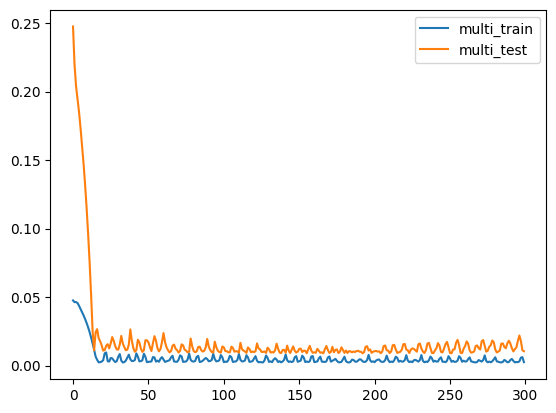

In [ ]:
pyplot.plot(multi_history.history['loss'], label='multi_train')
pyplot.plot(multi_history.history['val_loss'], label='multi_test')
pyplot.legend()
pyplot.show()


21/21 [==============================] - 0s 2ms/step


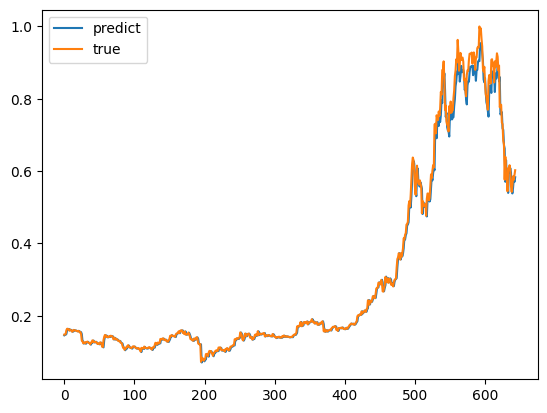

In [ ]:
yhat = multi_model.predict(test_X)
pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()

In [ ]:
max(yhat)

array([0.95413184], dtype=float32)

In [ ]:
min(yhat)

array([0.07105976], dtype=float32)

In [ ]:
max(yhat)-min(yhat)

array([0.8830721], dtype=float32)

In [ ]:
data.tail(100)

,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
date,,,,,,,,,,,,,,,,,,,,,
2021-02-24,we are committed to solving the technology pr...,the company holds an aggregate of approximate...,northern data ag is hoping to finish the 1 gig...,xsigma passes security audit and prepares to l...,i think regulators should step in and ban bit...,bitfinex and tether recklessly and unlawfull...,recently jigstack partnered with polygon fo...,physical card collectors may also receive an ...,the bitcoin mining company northern data ag s...,the fed has appointed a pro bitcoin chief inno...,...,NaN,NaN,NaN,NaN,49697.5,48911.1,51311.8,47031.7,153.75K,1.61%
2021-02-25,what s interesting about one of the bitcoin a...,coinbase has filed for an ipo with the sec via...,in just two weeks kim claimed he earned over ...,we have certain major concerns about cryptocu...,so far in terms of digital asset exchanges ap...,animoca brands brings motogp ignition to fl...,the dramatic btc derivatives fever has seemin...,the u s securities and exchange commission sa...,the bank is close to completing our review of...,in their submission plaintiffs claimed that t...,...,NaN,NaN,NaN,NaN,46928.5,49695.9,52013.8,46773.7,83.22K,-5.57%
2021-02-26,some pdax users bought bitcoin at the low pri...,almost a fifth of america s monetary supply wa...,fd7 ventures has already begun the process of ...,the company pointed out that the payment of ta...,fungram ltd has applied for exempt offering of...,overall the report praises that crypto regula...,the central bank of nigeria governor also reit...,i don t think bitcoin is going to end up the...,the latest onramp announcements by skrill and ...,philippine crypto exchange pdax recently suffe...,...,NaN,NaN,NaN,NaN,46345.6,46928.5,48413.9,44248.2,189.41K,-1.24%
2021-02-27,in addition to the old 2010 bitcoin moves bl...,avenue investment crypto expects to collect al...,arca s bitcoin trust will compete with graysc...,some nigerians say vice president yemi osinbaj...,the people s bank of china has been actively w...,central asia and north america were the two re...,the total exposure of the crypto hedge fund ra...,bordier amp cie scma praised the total crypt...,the nigerian vice president yemi osinbajo says...,for decades on end the u s government has cr...,...,NaN,NaN,NaN,NaN,46136.7,46333.1,48335.1,45059.4,98.75K,-0.45%
2021-02-28,bitcoin has plummeted from its all time high ...,on sunday february 28 2021 the mysterious w...,hong kong is home to some of the largest cry...,crypto assets continue to rank as the poores...,private innovation can come out for a while ...,asia is the most active crypto market we ha...,the best performing bitcoin exchange traded pr...,whatever the case may be the sky high btc pr...,in a multi asset portfolio investors can lik...,right now it is an asset class and i suppose ...,...,NaN,NaN,NaN,NaN,45164.0,46136.0,46582.0,43100.6,135.08K,-2.11%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-30,after the installation of microbt whatsminers ...,i write today with concern about the risks ta...,once the public had embraced this this new f...,brazilian taxpayers must report cryptocurrenc...,i wouldn t short it because i don t like putt...,at the time of publication btc dominance sta...,i don t tell people how to spend their money ...,riksbank partners with private companies for t...,before we engage with cryptocurrencies we s...,in addition to the recent 440m financing cir...,...,NaN,NaN,NaN,NaN,35652.8,34589.3,36388.6,33441.0,104.18K,3.09%
2021-05-31,brazil is one of the pioneers of cdbc s study ...,since january 2018 the bitcoin network has s...,rbi tells banks the crypto banking ban is no...,stats show that the top mining pools with the ...,japan s fsa has sent a warning to the cryptoc...,the asics were confiscated by the police but ...,wallet adds eth,home cryptocurrency mining spreads in

In [ ]:
!pip install twython

In [ ]:
data.fillna(" ",inplace=True)

In [ ]:
data.reset_index()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
0,2015-07-12,bitcoin the next logical step in the rise of u...,,,,,,,,,...,,,,,310.4,292.0,315.9,291.3,120.70K,6.33%
1,2015-07-13,bitgive foundation announces new initiatives a...,,,,,,,,,...,,,,,290.4,310.4,310.9,276.9,146.85K,-6.47%
2,2015-07-14,keynote 2015 harnessing the distributed ledge...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,,,,,,,...,,,,,287.0,290.4,297.0,285.2,60.62K,-1.17%
3,2015-07-15,patrick byrne says will be able to replace w...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,,,,,,,...,,,,,283.4,287.0,292.9,283.2,59.58K,-1.23%
4,2015-07-16,2015 q1 bitcoin investment trumps 2014 numbers...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,,,,,,,...,,,,,276.6,283.4,290.8,273.3,121.32K,-2.41%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2021-05-30,after the installation of microbt whatsminers ...,i write today with concern about the risks ta...,once the public had embraced this this new f...,brazilian taxpayers must report cryptocurrenc...,i wouldn t short it because i don t like putt...,at the time of publication btc dominance sta...,i don t tell people how to spend their money ...,riksbank partners with private companies for t...,before we engage with cryptocurrencies we s...,...,,,,,35652.8,34589.3,36388.6,33441.0,104.18K,3.09%
2142,2021-05-31,brazil is one of the pioneers of cdbc s study ...,since january 2018 the bitcoin network has s...,rbi tells banks the crypto banking ban is no...,stats show that the top mining pools with the ...,japan s fsa has sent a warning to the cryptoc...,the asics were confiscated by the police but ...,wallet adds eth,home cryptocurrency mining spreads in brazil ...,the chinese economist explained that with bitc...,...,,,,,37298.6,35644.0,37480.7,34213.2,131.70K,4.62%
2143,2021-06-01,our maiden sto listing on the dbs digital ex...,coinbase card users can now use your coinbas...,it s been seven years and three months since t...,these scams and ponzi schemes have affected th...,leading chinese online brokers dive into cryp...,an online petition has been signed by 2 25 mil...,central bank of ireland top official says cry...,we think it is just a matter of time before i...,at the time of deposit vitalik buterin s init...,...,,,,,36687.6,37294.3,37850.3,35742.7,113.48K,-1.64%
2144,2021-06-02,expanding cryptocurrency analysis to find and...,foreign companies like bitfarms are entering ...,the last 2009 bitcoin block reward spent befo...,toronto s southdown dental clinic now takes c...,standard chartered is launching a cryptocurre...,the 1gb bitcoincash scalenet block was mined ...,kirobo makes undo button available for usdt ...,the artists say that the mysterious bitcoin i...,a british man has shared his story of how his ...,...,,,,,37555.8,36687.7,38199.9,35981.1,96.89K,2.37%


In [ ]:
r_data = pd.DataFrame(data)
r_data.columns

Index(['top_0', 'top_1', 'top_2', 'top_3', 'top_4', 'top_5', 'top_6', 'top_7',
       'top_8', 'top_9', 'top_10', 'top_11', 'top_12', 'top_13', 'top_14',
       'top_15', 'top_16', 'top_17', 'top_18', 'top_19', 'top_20', 'top_21',
       'top_22', 'top_23', 'top_24', 'top_25', 'top_26', 'top_27', 'top_28',
       'top_29', 'top_30', 'top_31', 'top_32', 'top_33', 'top_34', 'top_35',
       'price', 'open', 'high', 'low', 'vol.', 'change %'],
      dtype='object')

In [ ]:
df.columns

Index(['top_0', 'top_1', 'top_2', 'top_3', 'top_4', 'top_5', 'top_6', 'top_7',
       'top_8', 'top_9', 'top_10', 'top_11', 'top_12', 'top_13', 'top_14',
       'top_15', 'top_16', 'top_17', 'top_18', 'top_19', 'top_20', 'top_21',
       'top_22', 'top_23', 'top_24', 'top_25', 'top_26', 'top_27', 'top_28',
       'top_29', 'top_30', 'top_31', 'top_32', 'top_33', 'top_34', 'top_35'],
      dtype='object')

In [ ]:
array = df.values


In [ ]:
len(array)

2146

In [ ]:
train = array[:1746,:]
test = array[1746:,:]
train

array([['bitcoin the next logical step in the rise of unbanked mobile payments     bitcoin',
        nan, nan, ..., nan, nan, nan],
       ['bitgive foundation announces new initiatives at inside bitcoins chicago    bitcoin',
        nan, nan, ..., nan, nan, nan],
       ['keynote 2015  harnessing the distributed ledger    bitcoin',
        'the blockchain  towards crypto sovereignty    bitcoin',
        'coinbase outage is a reminder to not store bitcoins on an exchange or online wallet platform    bitcoin',
        ..., nan, nan, nan],
       ...,
       ['economists predict great depression ii for us economy  fast or v shaped recovery unlikely    ',
        'tnc it group s token to be listed this april    ',
        'the greatest wealth transfer  economists predict the emergence of new bitcoin millionaires  btc capturing 3  of gold market    ',
        ..., nan, nan, nan],
       ['bitcoin halving theories  whale says price rise is a  nonsensical narrative   weiss ratings expects  m

In [ ]:
test

array([['famed economist speaks   us coronavirus bailout scam   american imperialism  de dollarization    ',
        'telegram to pay back investors 110  after gram token launch fails   again    ',
        'cryptocurrency trading surges in malaysia as lockdown cripples economy    ',
        ..., nan, nan, nan],
       ['while the global economy shudders  andreessen horowitz  excited  to invest  500m into the crypto industry    ',
        'sec commissioner sees increasing demand for cryptocurrency    ',
        'google profits off impersonations of banned cryptocurrency celebs and companies    ',
        ..., nan, nan, nan],
       ['ecb in full on emergency mode as  unprecedented decline  hits eurozone    ',
        'player hits  250 000  29 btc  slots jackpot staying at home    ',
        'uk cryptocurrency firms turn to equity funding as ico coffers plunge 70     ',
        ..., nan, nan, nan],
       ...,
       [' our maiden  sto listing on the dbs digital exchange is a significant

In [ ]:
headlines_train = []
for sen in train:
  if sen.all() == 'nan':
    continue
  else:
    headlines_train.append(' '.join(str(x) for x in sen))

In [ ]:
headlines_train

['bitcoin the next logical step in the rise of unbanked mobile payments     bitcoin nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan',
 'bitgive foundation announces new initiatives at inside bitcoins chicago    bitcoin nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan',
 'keynote 2015  harnessing the distributed ledger    bitcoin the blockchain  towards crypto sovereignty    bitcoin coinbase outage is a reminder to not store bitcoins on an exchange or online wallet platform    bitcoin nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan',
 'patrick byrne says   will be able to replace wall street    bitcoin bitcoin in review  interesting trends in q1 of 2015    bitcoin cloudminr user accounts hacked  data sold for a single bitcoi

In [ ]:
train.shape, test.shape

((1746, 36), (400, 36))

In [ ]:
headlines_train[0:5]

['bitcoin the next logical step in the rise of unbanked mobile payments     bitcoin nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan',
 'bitgive foundation announces new initiatives at inside bitcoins chicago    bitcoin nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan',
 'keynote 2015  harnessing the distributed ledger    bitcoin the blockchain  towards crypto sovereignty    bitcoin coinbase outage is a reminder to not store bitcoins on an exchange or online wallet platform    bitcoin nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan',
 'patrick byrne says   will be able to replace wall street    bitcoin bitcoin in review  interesting trends in q1 of 2015    bitcoin cloudminr user accounts hacked  data sold for a single bitcoi

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

def Sentiment(sentence):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(sentence)
    return sentiment_score

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sentiment_scores = []
for i in headlines_train:
    sentiment_scores.append(Sentiment(i))
sentiment_scores

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.04, 'neu': 0.92, 'pos': 0.04, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.942, 'pos': 0.058, 'compound': 0.5423},
 {'neg': 0.041, 'neu': 0.87, 'pos': 0.089, 'compound': 0.4939},
 {'neg': 0.041, 'neu': 0.959, 'pos': 0.0, 'compound': -0.3182},
 {'neg': 0.076, 'neu': 0.879, 'pos': 0.045, 'compound': -0.25},
 {'neg': 0.079, 'neu': 0.921, 'pos': 0.0, 'compound': -0.6369},
 {'neg': 0.094, 'neu': 0.906, 'pos': 0.0, 'compound': -0.6597},
 {'neg': 0.065, 'neu': 0.935, 'pos': 0.0, 'compound': -0.6249},
 {'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.743},
 {'neg': 0.081, 'neu': 0.801, 'pos': 0.118, 'compound': 0.4588},
 {'neg': 0.0, 'neu': 0.951, 'pos': 0.049, 'compound': 0.4019},
 {'neg': 0.032, 'neu': 0.81, 'pos': 0.158, 'compound': 0.8481},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.02, 'ne

In [ ]:
sentiments = []
for sentiment_score in sentiment_scores:
    sentiments.append(sentiment_score['compound'])
sentiments

[0.0,
 0.0,
 0.0,
 0.0,
 0.5423,
 0.4939,
 -0.3182,
 -0.25,
 -0.6369,
 -0.6597,
 -0.6249,
 0.743,
 0.4588,
 0.4019,
 0.8481,
 0.0,
 -0.1027,
 0.7351,
 0.0,
 0.8074,
 0.5859,
 -0.5106,
 0.0,
 0.128,
 0.5267,
 0.0,
 0.8176,
 -0.4336,
 0.2111,
 -0.0516,
 -0.5574,
 0.0,
 0.4019,
 0.6486,
 0.0,
 -0.8591,
 0.4767,
 -0.2263,
 0.5423,
 -0.5994,
 0.4767,
 0.4588,
 0.765,
 -0.3612,
 -0.3182,
 0.6808,
 0.34,
 0.0,
 0.0,
 0.2732,
 -0.0516,
 0.4019,
 0.0,
 0.0258,
 0.6369,
 0.3818,
 0.0,
 0.7783,
 0.8555,
 0.4767,
 0.0,
 0.4019,
 0.3818,
 0.0,
 0.8555,
 0.3182,
 0.4497,
 0.624,
 0.5859,
 0.7351,
 0.6249,
 -0.6249,
 0.1531,
 0.7096,
 0.0,
 -0.296,
 -0.1779,
 0.8955,
 0.8689,
 0.8555,
 0.0,
 0.5223,
 0.8126,
 0.6369,
 0.5719,
 0.0258,
 0.0567,
 0.4019,
 0.9779,
 -0.1027,
 0.0,
 0.0,
 0.6249,
 0.0,
 0.0,
 0.8591,
 0.8689,
 0.7269,
 0.0,
 0.0,
 0.6249,
 -0.5037,
 -0.4215,
 0.9062,
 -0.5106,
 0.743,
 -0.3612,
 0.34,
 0.7964,
 0.0516,
 0.6249,
 0.0,
 0.0,
 -0.4404,
 0.9245,
 -0.1027,
 0.9633,
 -0.5875,
 

In [ ]:
data = pd.DataFrame({'Sentiments': sentiments})

In [ ]:
data['tweets'] = headlines_train
data.dropna()
data

,Sentiments,tweets
0,0.0000,bitcoin the next logical step in the rise of u...
1,0.0000,bitgive foundation announces new initiatives a...
2,0.0000,keynote 2015 harnessing the distributed ledge...
3,0.0000,patrick byrne says will be able to replace w...
4,0.5423,2015 q1 bitcoin investment trumps 2014 numbers...
...,...,...
1741,0.8860,is bitcoin a good investment analyst predicts...
1742,0.2263,bitcoin car finishes first in virtual nascar r...
1743,0.9118,economists predict great depression ii for us ...
1744,-0.1027,bitcoin halving theories whale says price ris...


In [ ]:
data['tweets'][0]

'bitcoin the next logical step in the rise of unbanked mobile payments     bitcoin nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan'

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
import google.generativeai as genai
import os

In [ ]:
!pip install Pillow

In [ ]:
gemini_api_key = ''
genai.configure(api_key=gemini_api_key)

In [ ]:
#Text generation

from IPython.display import Markdown

In [ ]:
model = genai.GenerativeModel('gemini-pro')
def report(sentiment,sentence):
  prompt = "given a sentence and a sentiment score of it. Create a report from the data whether to trade bitcoin at that sentiment_score or not. the sentiment_scores and tweets are : "+sentence+str(sentiment)
  response = model.generate_content(prompt)
  return response.text

In [ ]:
dc = pd.read_csv('/content/sample_data/btcNewsToPrice2.csv')

In [ ]:
dc

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
0,2015-07-12,bitcoin the next logical step in the rise of u...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,310.4,292.0,315.9,291.3,120.70K,6.33%
1,2015-07-13,bitgive foundation announces new initiatives a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,290.4,310.4,310.9,276.9,146.85K,-6.47%
2,2015-07-14,keynote 2015 harnessing the distributed ledge...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,287.0,290.4,297.0,285.2,60.62K,-1.17%
3,2015-07-15,patrick byrne says will be able to replace w...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,283.4,287.0,292.9,283.2,59.58K,-1.23%
4,2015-07-16,2015 q1 bitcoin investment trumps 2014 numbers...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,276.6,283.4,290.8,273.3,121.32K,-2.41%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2021-05-30,after the installation of microbt whatsminers ...,i write today with concern about the risks ta...,once the public had embraced this this new f...,brazilian taxpayers must report cryptocurrenc...,i wouldn t short it because i don t like putt...,at the time of publication btc dominance sta...,i don t tell people how to spend their money ...,riksbank partners with private companies for t...,before we engage with cryptocurrencies we s...,...,NaN,NaN,NaN,NaN,35652.8,34589.3,36388.6,33441.0,104.18K,3.09%
2142,2021-05-31,brazil is one of the pioneers of cdbc s study ...,since january 2018 the bitcoin network has s...,rbi tells banks the crypto banking ban is no...,stats show that the top mining pools with the ...,japan s fsa has sent a warning to the cryptoc...,the asics were confiscated by the police but ...,wallet adds eth,home cryptocurrency mining spreads in brazil ...,the chinese economist explained that with bitc...,...,NaN,NaN,NaN,NaN,37298.6,35644.0,37480.7,34213.2,131.70K,4.62%
2143,2021-06-01,our maiden sto listing on the dbs digital ex...,coinbase card users can now use your coinbas...,it s been seven years and three months since t...,these scams and ponzi schemes have affected th...,leading chinese online brokers dive into cryp...,an online petition has been signed by 2 25 mil...,central bank of ireland top official says cry...,we think it is just a matter of time before i...,at the time of deposit vitalik buterin s init...,...,NaN,NaN,NaN,NaN,36687.6,37294.3,37850.3,35742.7,113.48K,-1.64%
2144,2021-06-02,expanding cryptocurrency analysis to find and...,foreign companies like bitfarms are entering ...,the last 2009 bitcoin block reward spent befo...,toronto s southdown dental clinic now takes c...,standard chartered is launching a cryptocurre...,the 1gb bitcoincash scalenet block was mined ...,kirobo makes undo button available for usdt ...,the artists say that the mysterious bitcoin i...,a british man has shared his story of how his ...,...,NaN,NaN,NaN,NaN,37555.8,36687.7,38199.9,35981.1,96.89K,2.37%


In [ ]:
arr = dc.values

In [ ]:
test_ex = arr[2143,0:]
test_ex


array(['2021-06-01',
       ' our maiden  sto listing on the dbs digital exchange is a significant milestone  as it highlights the strength of our digital asset ecosystem in facilitating new ways of unlocking value    crypto  ',
       'coinbase card users  can now use your  coinbase card with  applepay and  googlepay and  earn up to 4  back in  crypto rewards    bitcoin  ',
       'it s been seven years and three months since the collapse of the famous japanese crypto exchange mt gox   bitcoin  cryptocurrency  ',
       'these scams and ponzi schemes have affected thousands of ordinary people   cryptocurrency  ',
       'leading chinese online brokers dive into  cryptocurrency trading   ',
       'an online petition has been signed by 2 25 million people which calls for  stimulus checks for  2k for adults and  1k for child dependents   ',
       'central bank of ireland top official says  cryptocurrencies are  of great concern    ',
       ' we think it is just a matter of time before

In [ ]:
sent = test_ex[1]+test_ex[2]+test_ex[3]+test_ex[4]+test_ex[5]+test_ex[6]
sent

' our maiden  sto listing on the dbs digital exchange is a significant milestone  as it highlights the strength of our digital asset ecosystem in facilitating new ways of unlocking value    crypto  coinbase card users  can now use your  coinbase card with  applepay and  googlepay and  earn up to 4  back in  crypto rewards    bitcoin  it s been seven years and three months since the collapse of the famous japanese crypto exchange mt gox   bitcoin  cryptocurrency  these scams and ponzi schemes have affected thousands of ordinary people   cryptocurrency  leading chinese online brokers dive into  cryptocurrency trading   an online petition has been signed by 2 25 million people which calls for  stimulus checks for  2k for adults and  1k for child dependents   '

In [ ]:
res = Sentiment(sent)

In [ ]:
res = res['compound']

In [ ]:
res

0.5267

In [ ]:
r = report(res,sent)
Markdown(r)

**Sentiment Analysis Report**

**Date:** 2023-04-27

**Subject:** Bitcoin Trading Recommendation

**Sentiment Score:** 0.5267

**Analysis:**

The sentiment score of 0.5267 indicates a slightly positive sentiment towards Bitcoin. This suggests that investors may be cautiously optimistic about the cryptocurrency's future prospects. However, it is important to note that this is just one data point and should not be used as the sole basis for making investment decisions.

**Recommendation:**

Based on the sentiment score alone, it is difficult to make a clear recommendation on whether or not to trade Bitcoin. However, investors who are considering trading Bitcoin should carefully consider all of the available information before making a decision. This includes factors such as the current market conditions, the news and events surrounding Bitcoin, and the investor's own risk tolerance.

**Additional Considerations:**

* The cryptocurrency market is volatile and unpredictable. Even a slightly positive sentiment score does not guarantee that Bitcoin will continue to rise in value.
* Investors should always do their own research before making any investment decisions. This includes understanding the risks involved and the potential rewards.
* Investors should consider their own financial situation and risk tolerance before making any investment decisions.

**Disclaimer:**

This report is for informational purposes only and should not be considered investment advice. Investors should always consult with a qualified financial advisor before making any investment decisions.